# (A) Dependencies

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

# (B) Dataset

### Downloading the dataset via kaggle api
- [Kaggle  Dataset](https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess)

In [ ]:
# Download kaggle api
!pip install -q kaggle

In [ ]:
# Creat the convenient dir for token. (The system will seach this dir)
! mkdir ~/.kaggle

- Upload your kaggle token
- For creating a token
  - Sign in your Kaggle account,
  - Open Account section from  your icon menu
  - Scroll to API section
  -  Click on __Create New API Token__
     - It will download kaggle.json file on your machine. 
  - Upload this kaggle.json file into your working directory on your google colab session.
  - Run floowing codes

In [ ]:
# upload your kaggle token to download dataset.
from google.colab import files
files.upload();

Saving kaggle.json to kaggle.json


In [ ]:
# Copy the json file into correct path, then remove the firt one it
! cp kaggle.json ~/.kaggle/
! rm -f kaggle.json

In [ ]:
# Set the token can't readable for other user if you save it somewhere
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download your data "Competition-name"
#! kaggle competitions download -c 'competition-name'
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 99% 422M/428M [00:03<00:00, 143MB/s]
100% 428M/428M [00:03<00:00, 121MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
!ls

 sample_data
'tess toronto emotional speech set data'
'TESS Toronto emotional speech set data'
 toronto-emotional-speech-set-tess.zip


## Loading the dataset

In [ ]:
paths = []
labels = []
dataset_size = 2800
for dirname, _, filenames in os.walk('TESS Toronto emotional speech set data'):
    
    # collecting the dataset
    for filename in filenames:
        
        # collecting the paths
        paths.append(os.path.join(dirname, filename))
        
        # extracting the labels   
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    
    # check the limitations
    if len(paths) == dataset_size: break

Dataset is Loaded


In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,TESS Toronto emotional speech set data/OAF_ang...,angry
1,TESS Toronto emotional speech set data/OAF_ang...,angry
2,TESS Toronto emotional speech set data/OAF_ang...,angry
3,TESS Toronto emotional speech set data/OAF_ang...,angry
4,TESS Toronto emotional speech set data/OAF_ang...,angry


## Dataset Information

Context
I'm on a journey to create an emotion classifier from audio and the TESS dataset is one of the 4 key datasets that I was lucky to stumble upon. What's interesting is that this dataset is female only and is of very high quality audio. Most of the other dataset is skewed towards male speakers and thus brings about a slightly imbalance representation. So because of that, this dataset would serve a very good training dataset for the emotion classifier in terms of generalisation (not overfitting)

Content
There are a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 data points (audio files) in total.

The dataset is organised such that each of the two female actor and their emotions are contain within its own folder. And within that, all 200 target words audio file can be found. The format of the audio file is a WAV format

Acknowledgements
I wanted to thank University of Toronto for putting together this awesome dataset!

## Attributes & Stats of the dataset

In [ ]:
# statistical info
df.head()

,speech,label
0,TESS Toronto emotional speech set data/OAF_ang...,angry
1,TESS Toronto emotional speech set data/OAF_ang...,angry
2,TESS Toronto emotional speech set data/OAF_ang...,angry
3,TESS Toronto emotional speech set data/OAF_ang...,angry
4,TESS Toronto emotional speech set data/OAF_ang...,angry


In [ ]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   speech  2800 non-null   object
 1   label   2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


In [ ]:
# check unique values in dataset
df['label'].value_counts()

angry      400
happy      400
sad        400
disgust    400
ps         400
neutral    400
fear       400
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

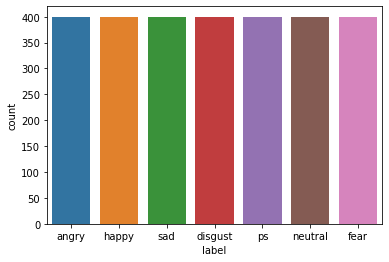

In [ ]:
sns.countplot(df['label'])

# (C) Exploratory Data Analysis

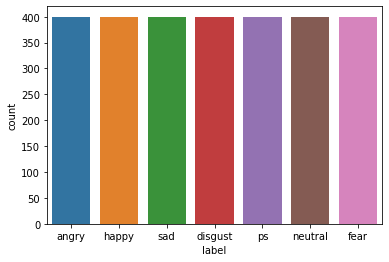

In [ ]:
sns.countplot(df['label']);

In [ ]:
def waveplot(data, sr, emotion, figsize=(20,10), title_size = 20):
    # setting the figure size
    plt.figure(figsize=figsize)

    # plotting the figure
    librosa.display.waveplot(data, sr=sr)
    plt.title(emotion, size=title_size)
    
def spectogram(data, sr, emotion, figsize=(20,10), title_size = 20):
    # setting the figure size
    plt.figure(figsize=figsize)
    
    # preparing the data
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))

    # plotting the data
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.title(emotion, size=title_size)
    plt.colorbar()

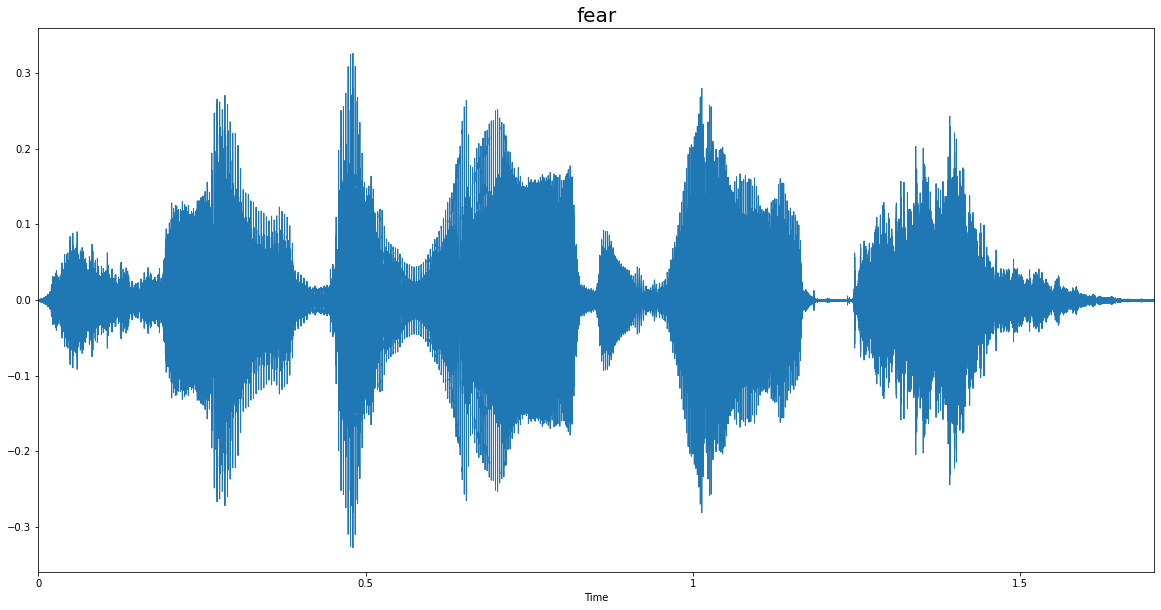

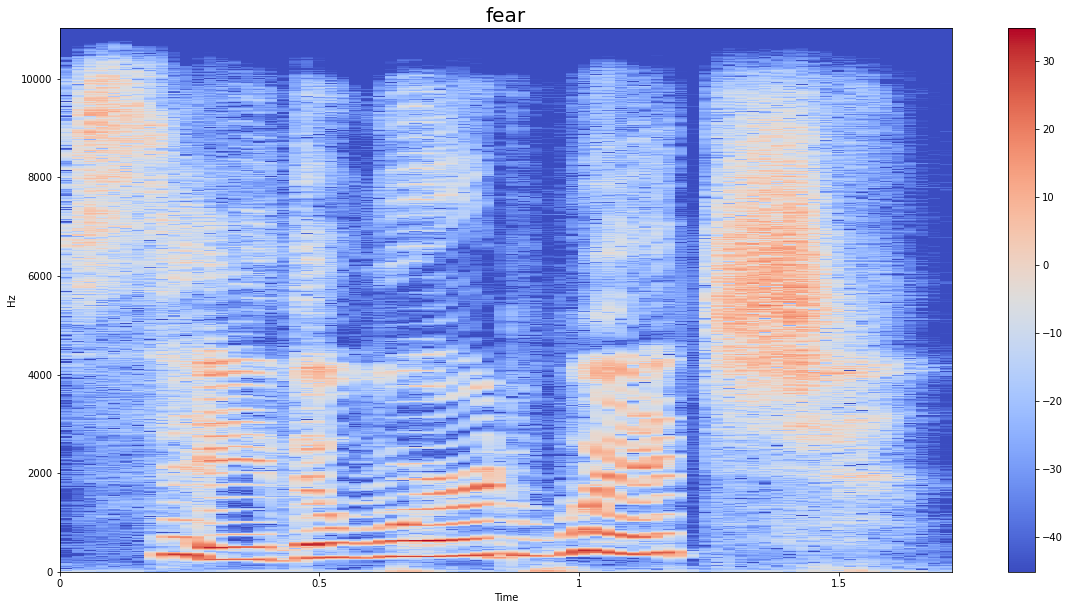

In [ ]:
from IPython.display import Audio

# getting a sample
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# plotting the data
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

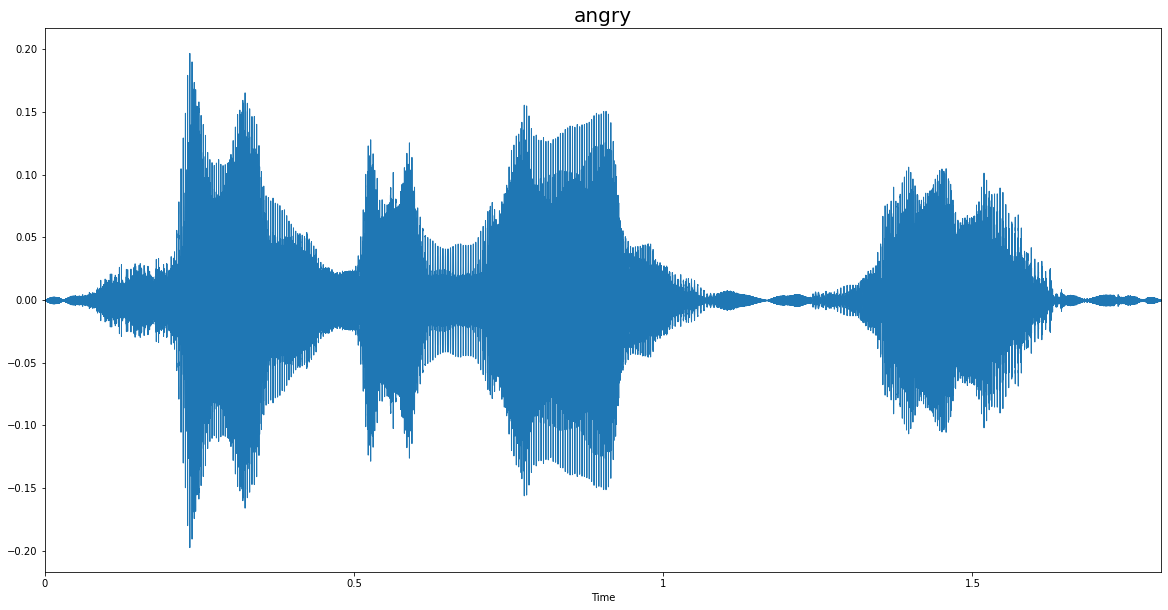

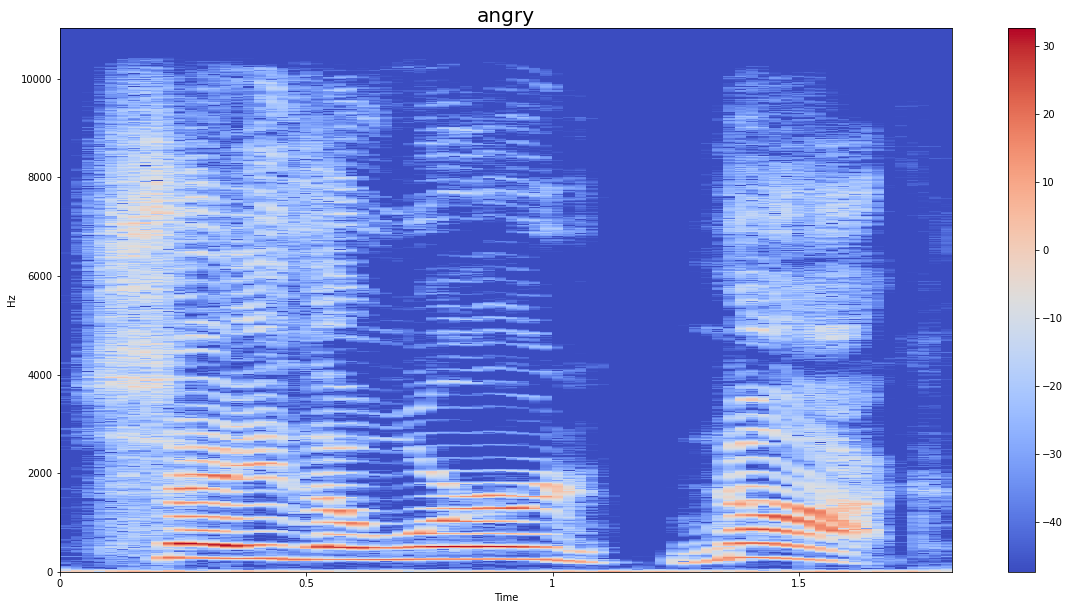

In [ ]:
from IPython.display import Audio

# getting the data
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)

# plotting the data
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

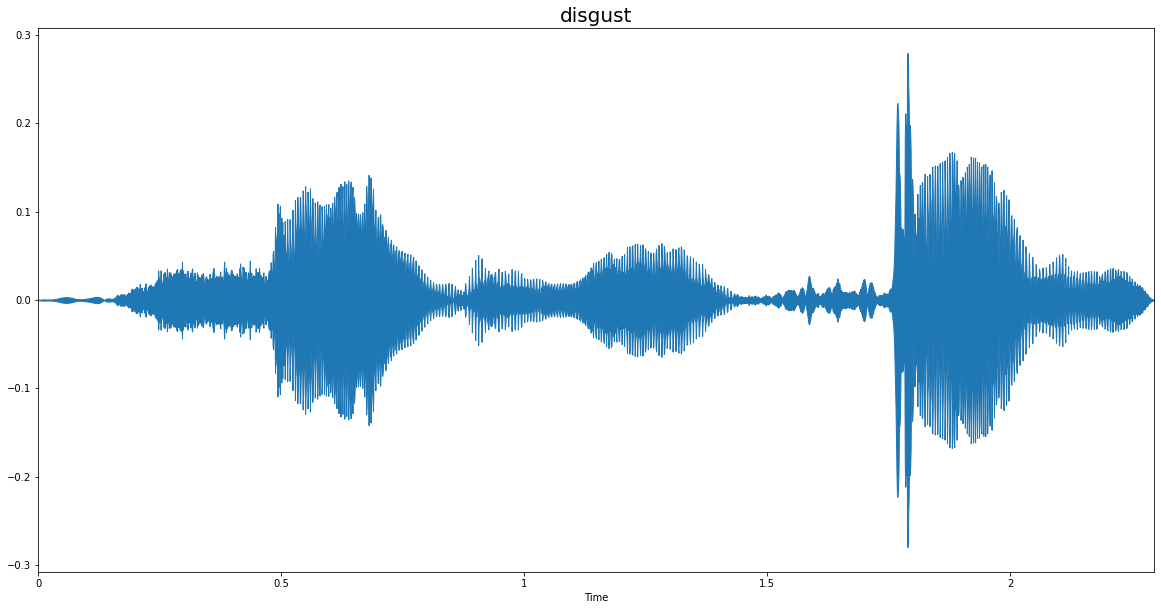

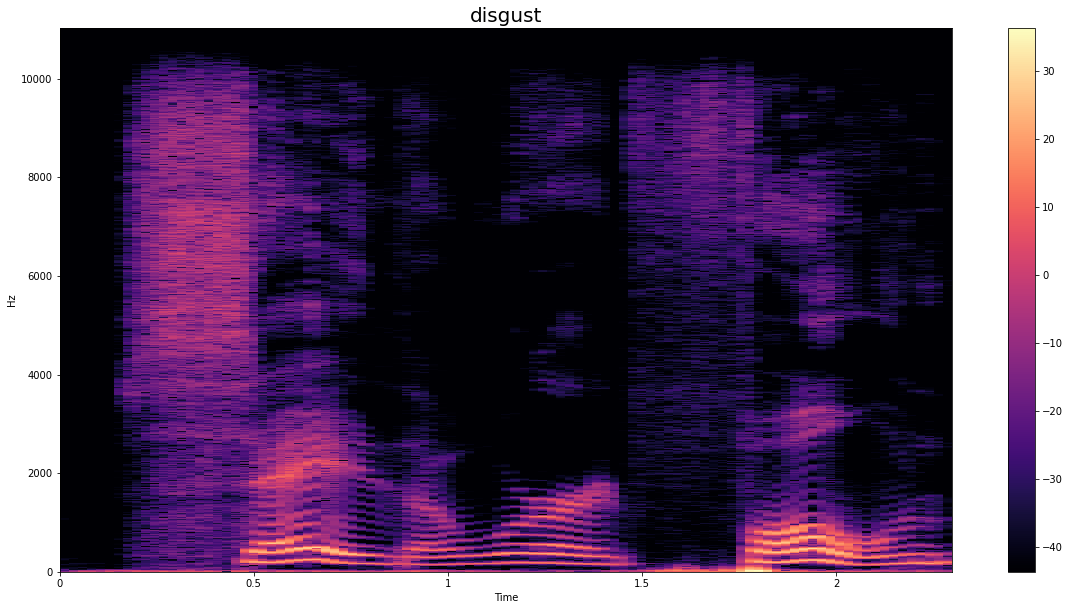

In [ ]:
from IPython.display import Audio

# getting the data
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# plotting the data
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

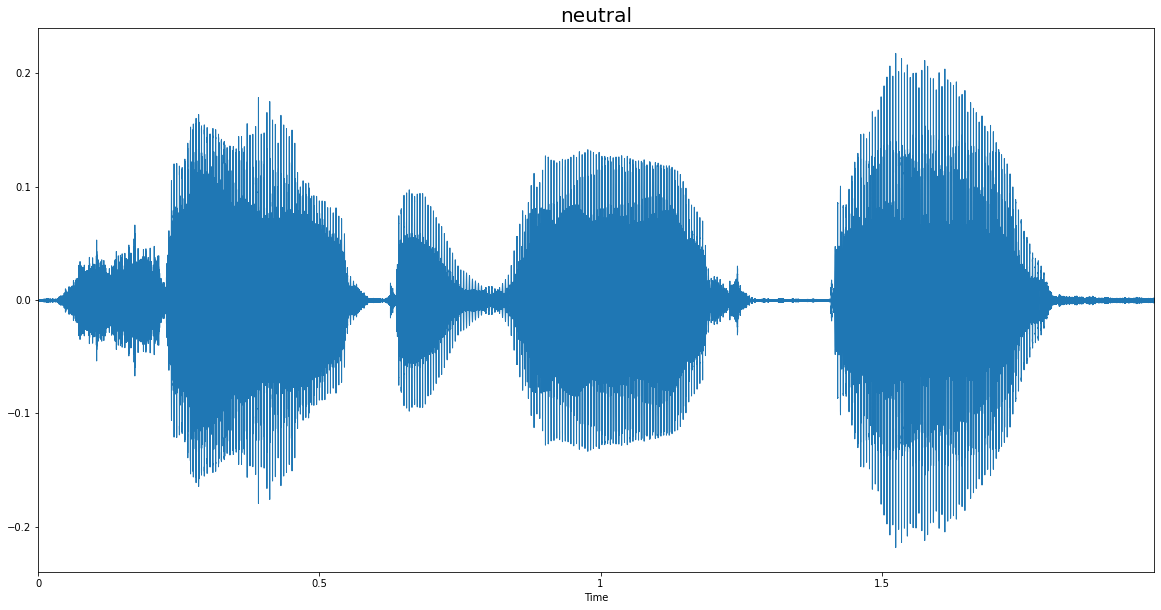

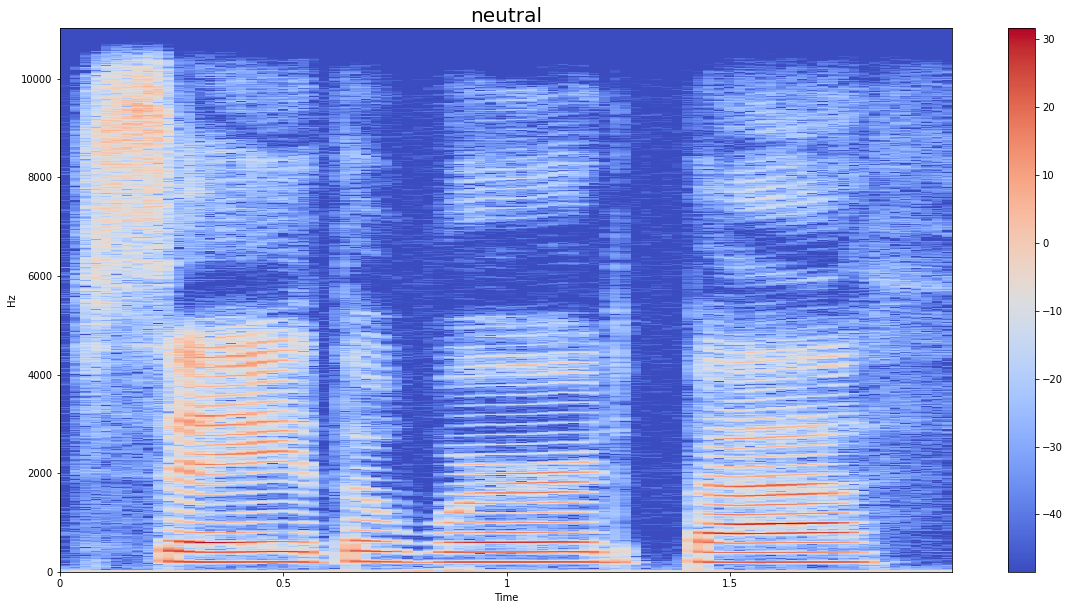

In [ ]:
from IPython.display import Audio

# getting the data
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# plotting the data
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

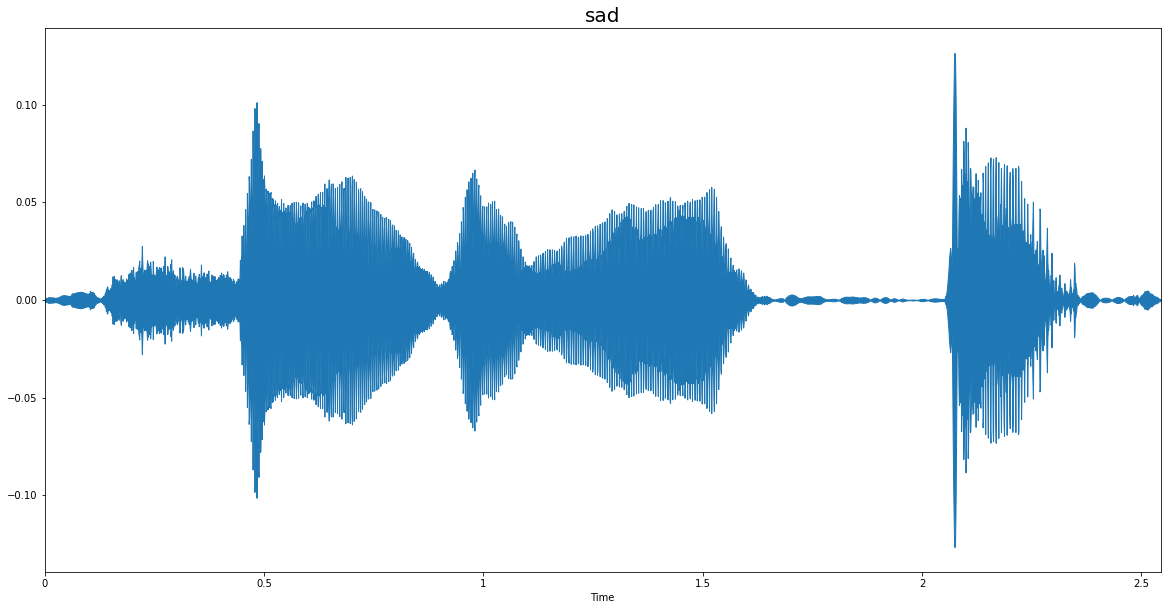

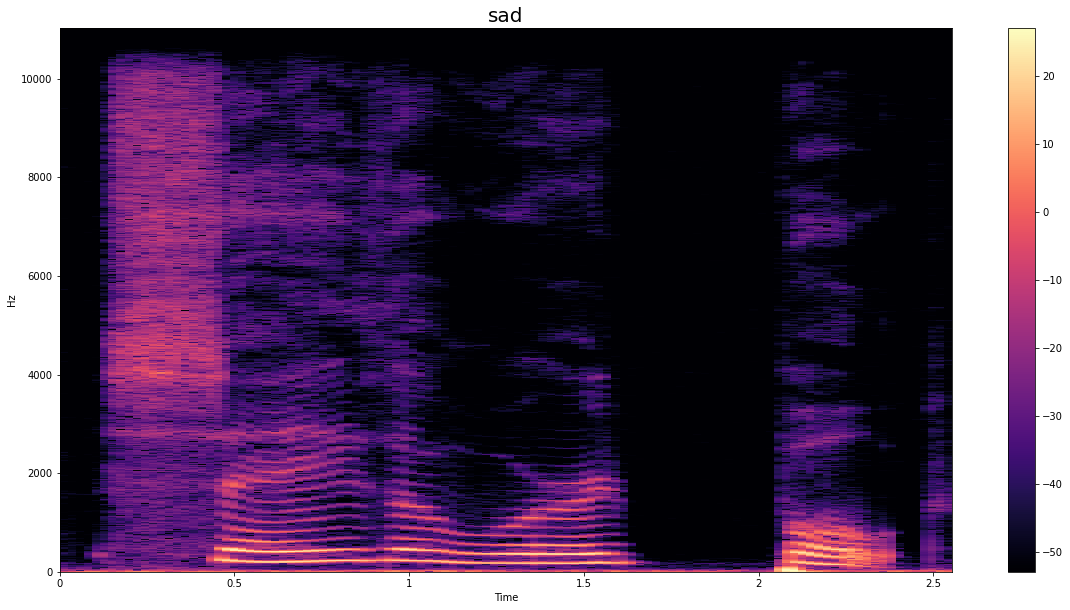

In [ ]:
from IPython.display import Audio

# getting the data
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# plotting the data
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

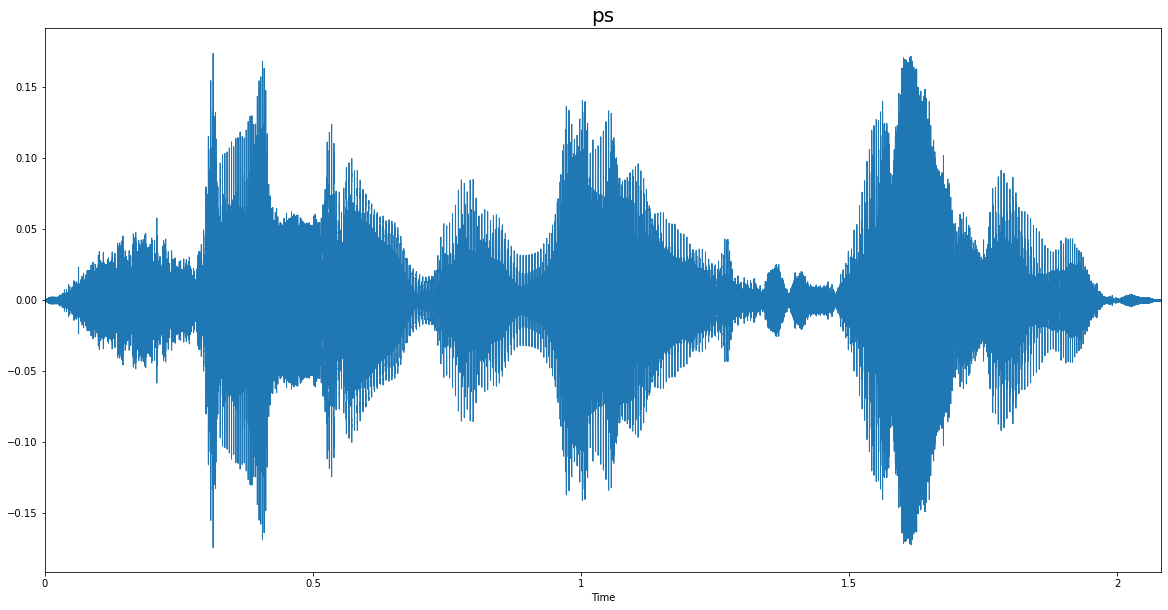

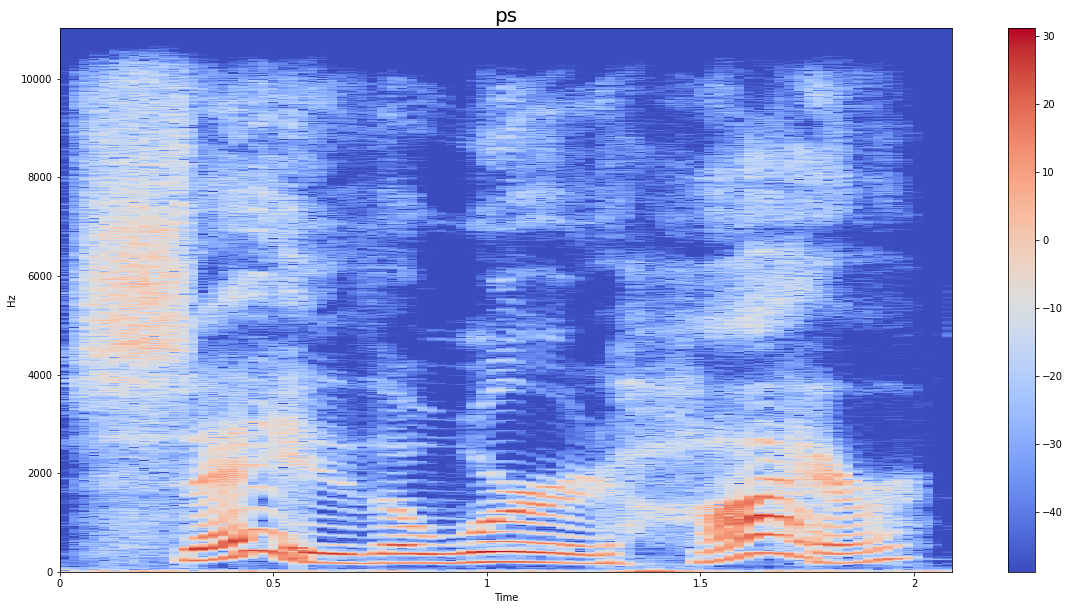

In [ ]:
from IPython.display import Audio

# getting the data
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# plotting the data
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

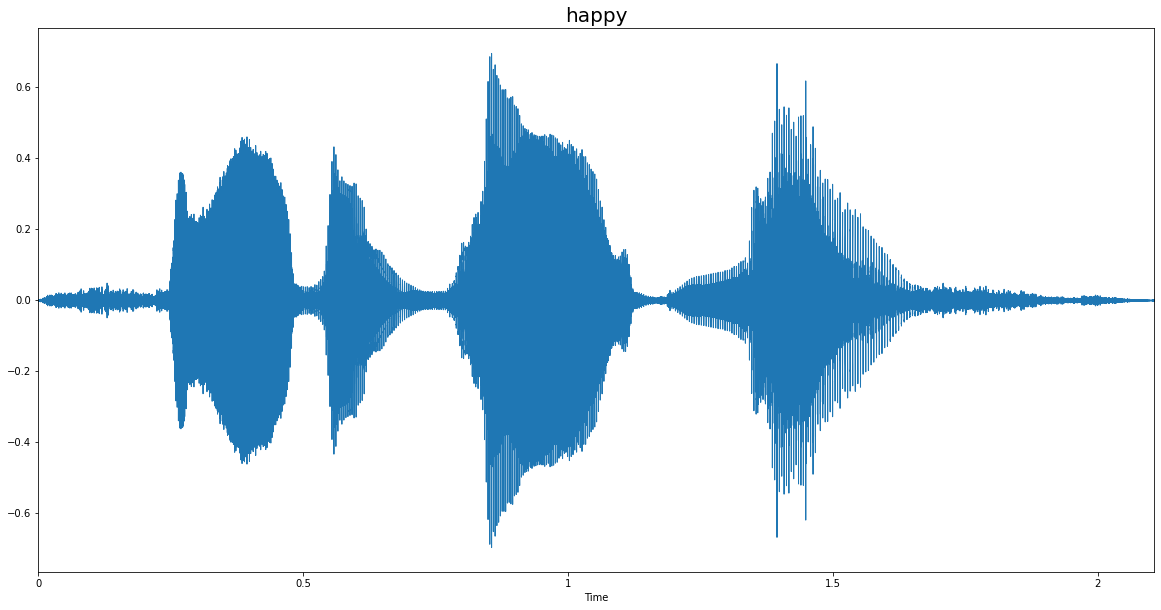

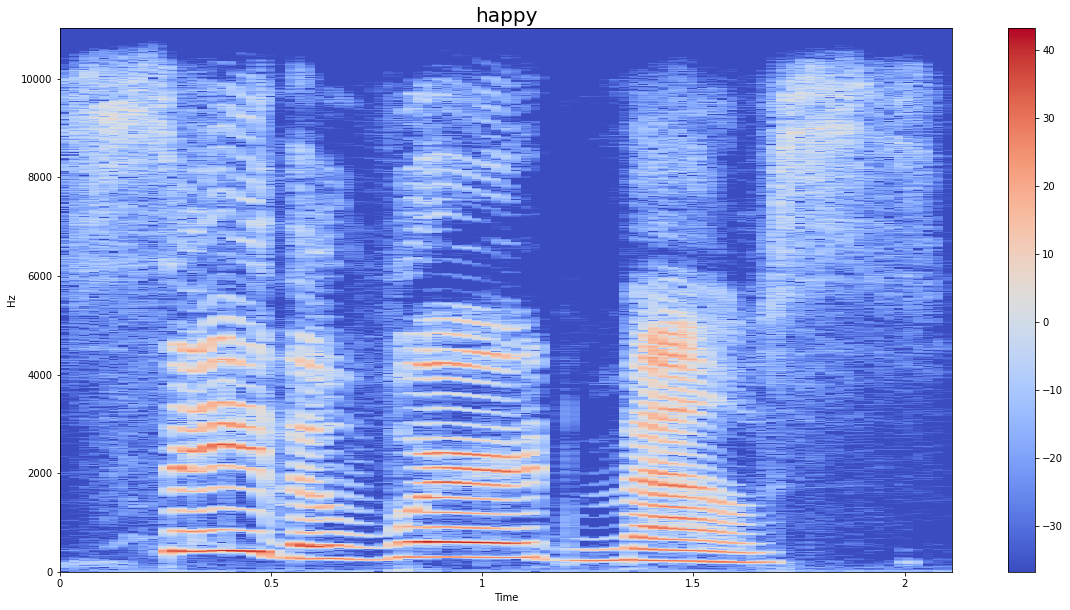

In [ ]:
from IPython.display import Audio

# getting the data
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# plotting the data
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# (D) Feature Extraction

In [ ]:
def extract_mfcc(filename, duration=3, offset=0.5, n_mfcc=40):
    # loading the data
    y, sr = librosa.load(filename, duration=duration, offset=offset)
    
    # extracting the voice feature
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc).T, axis=0)
    
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.6797388e+02,  7.5423798e+01, -7.2954178e+00, -1.1267856e+01,
        2.3808932e+00,  6.4572697e+00, -1.3130990e+01,  2.3063424e+00,
       -1.3203828e+01, -5.7221913e-01, -1.0301000e+01,  1.1466316e+01,
       -8.6814247e-02,  5.4453473e+00,  1.2443066e-01,  4.1656594e+00,
       -2.8178749e+00, -1.5288664e+00, -3.5547192e+00, -8.3460188e+00,
       -2.7618234e+00,  2.0535262e-01, -3.5408399e+00,  5.1555057e+00,
        7.0000634e+00,  1.5315465e+01,  1.4183146e+01,  2.5821907e+01,
        2.5272278e+01,  2.2298738e+01,  7.7199025e+00,  5.5815921e+00,
        5.0143781e+00,  6.1407027e+00,  7.2349124e+00, -7.1419096e-01,
       -8.9273435e-01,  4.7741914e+00,  3.4250066e+00,  7.6994376e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-467.97388, 75.4238, -7.295418, -11.267856, 2...
1       [-460.53174, 90.64832, -6.6270375, -22.33891, ...
2       [-421.38196, 98.38762, -13.285807, -20.22084, ...
3       [-378.2747, 79.839066, -12.969546, -2.9719515,...
4       [-374.31567, 64.773735, -2.8894641, -19.74739,...
                              ...                        
2795    [-367.74683, 79.99155, -11.52734, -1.8861971, ...
2796    [-323.37723, 45.00062, -44.066193, -2.4121091,...
2797    [-331.616, 76.70219, -13.050735, 16.4976, -28....
2798    [-347.81454, 103.04243, 7.1276803, 8.199029, -...
2799    [-366.21732, 50.300236, -12.889868, 35.763298,...
Name: speech, Length: 2800, dtype: object

# (E) Modelling

## Splitting the dataset

In [57]:
# adjusting the shape of the data for deep learning model 
X = [x for x in X_mfcc]
X = np.array(X)
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [58]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()

In [59]:
import pickle
pickle.dump(enc, open("encoder", 'wb'))
from google.colab import files
files.download("encoder")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## Architecture

In [61]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten

model=Sequential([
    # Block-1
    Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(40,1)),
    MaxPooling1D(pool_size=5, strides = 2, padding = 'same'),

    # Block-2
    Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    MaxPooling1D(pool_size=5, strides = 2, padding = 'same'),

    # Block-3
    Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'),
    MaxPooling1D(pool_size=5, strides = 2, padding = 'same'),
    Dropout(0.2),

    # Block-4
    Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'),
    MaxPooling1D(pool_size=5, strides = 2, padding = 'same'),
    Dropout(0.2),

    # Block-5
    Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'),
    MaxPooling1D(pool_size=5, strides = 2, padding = 'same'),
    
    # Block-6
    Flatten(),
    Dense(units=32, activation='relu'),
    Dropout(0.3),

    # Output layer
    Dense(units=7, activation='softmax')
])

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 40, 256)           1536      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 20, 256)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 20, 256)           327936    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 10, 256)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 10, 128)           163968    
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 5, 128)          

## Training

In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger, LearningRateScheduler, ReduceLROnPlateau, LambdaCallback
import numpy as np
import tensorflow as tf

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 5.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

def print_current_lr(epoch, logs):
    print("Learning rate in epoch {} is {}".format(epoch, float(tf.keras.backend.get_value(model.optimizer.lr))))

# Temporary save paths
checkpoint_path = "TemporaryModel_ModelCheckpoint.h5"
tb_log_dir = "./logs"

In [52]:
callbacks = [
    #LearningRateScheduler(step_decay),
    TensorBoard(log_dir=tb_log_dir),
    ModelCheckpoint(filepath= checkpoint_path, save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1),
    CSVLogger(filename='training.log'),
    #LambdaCallback(on_epoch_end=print_current_lr)
]

In [62]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, callbacks=callbacks)

Epoch 1/50
35/35 [==============================] - ETA: 0s - loss: 2.7521 - accuracy: 0.2134
Epoch 1: val_loss improved from 1.90784 to 1.54937, saving model to TemporaryModel_ModelCheckpoint.h5
35/35 [==============================] - 10s 174ms/step - loss: 2.7521 - accuracy: 0.2134 - val_loss: 1.5494 - val_accuracy: 0.4268
Epoch 2/50
35/35 [==============================] - ETA: 0s - loss: 1.4836 - accuracy: 0.4107
Epoch 2: val_loss improved from 1.54937 to 1.01911, saving model to TemporaryModel_ModelCheckpoint.h5
35/35 [==============================] - 7s 199ms/step - loss: 1.4836 - accuracy: 0.4107 - val_loss: 1.0191 - val_accuracy: 0.6500
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 1.1585 - accuracy: 0.5335
Epoch 3: val_loss improved from 1.01911 to 0.62679, saving model to TemporaryModel_ModelCheckpoint.h5
35/35 [==============================] - 6s 162ms/step - loss: 1.1585 - accuracy: 0.5335 - val_loss: 0.6268 - val_accuracy: 0.8089
Epoch 4/50
35/35 [

## PLotting the training history

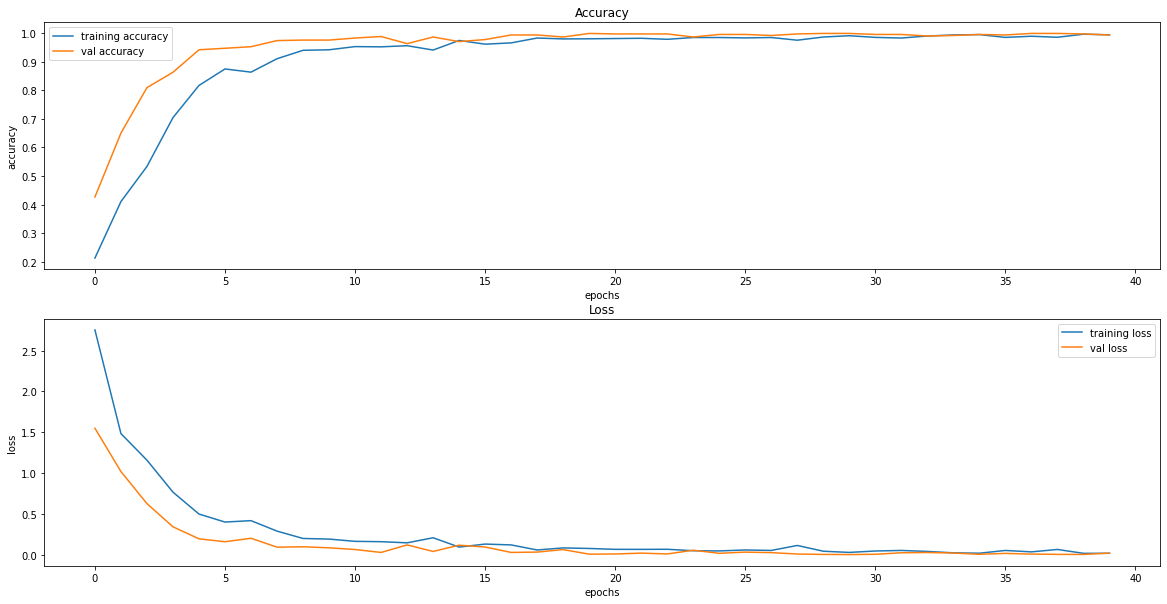

In [64]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


plt.subplot(2,1,2)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# (F) Saving the model

## Model

In [65]:
# Load the best weights
model.load_weights(checkpoint_path)

# best_model = tf.keras.models.load_model('saved_model/my_model') # best_model_save_path

In [70]:
model.evaluate(X_test, y_test)

18/18 [==============================] - 1s 28ms/step - loss: 0.0034 - accuracy: 0.9982


[0.0034157547634094954, 0.9982143044471741]

In [66]:
save_path = f"sound_emotion_rec_model"
model.save(save_path)

In [67]:
import os
os.system(f"zip -r {save_path}.zip {save_path}");

In [68]:
from google.colab import files
files.download(f"{save_path}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# (G) Deployment

In [1]:
import os
import pickle
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import StringLookup

if os.system("pip freeze | grep gradio==") != 0: os.system("pip install gradio")
import gradio as gr

In [2]:
!unzip examples.zip
!unzip sound_emotion_rec_model.zip

Archive:  examples.zip
   creating: examples/
  inflating: examples/OAF_back_neutral.wav  
  inflating: examples/OAF_back_happy.wav  
  inflating: examples/OAF_back_disgust.wav  
  inflating: examples/OAF_back_angry.wav  
  inflating: examples/OAF_back_sad.wav  
  inflating: examples/OAF_back_ps.wav  
  inflating: examples/OAF_back_fear.wav  
Archive:  sound_emotion_rec_model.zip
   creating: sound_emotion_rec_model/
   creating: sound_emotion_rec_model/variables/
  inflating: sound_emotion_rec_model/variables/variables.data-00000-of-00001  
  inflating: sound_emotion_rec_model/variables/variables.index  
 extracting: sound_emotion_rec_model/fingerprint.pb  
  inflating: sound_emotion_rec_model/saved_model.pb  
   creating: sound_emotion_rec_model/assets/
  inflating: sound_emotion_rec_model/keras_metadata.pb  


In [3]:
model_path = "sound_emotion_rec_model"
encoder_path = "encoder"
categories = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']

In [7]:
model = tf.keras.models.load_model(model_path)

enocder = pickle.load(open(encoder_path, 'rb'))

In [8]:
def extract_mfcc(audio_path, duration=3, offset=0.5, n_mfcc=40):
    # loading the data
    y, sr = librosa.load(audio_path, duration=duration, offset=offset)
    
    # extracting the voice feature
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc).T, axis=0)
    
    return mfcc

def prepare_data(audio_path):
  
  # extracting the features
  features = extract_mfcc(audio_path)

  # adjusting the shape
  features = [x for x in features]
  features = np.array(features)
  features = np.expand_dims(features, -1)

  return features

def clsf(audio_path):
  
  # extracting the features
  features = prepare_data(audio_path)

  # batching the data
  sample = np.expand_dims(features, axis=0)

  # predicting
  preds = model.predict(sample)[0]

  # results
  confidences = {categories[i]:np.round(float(preds[i]), 3) for i in range(len(categories))}

  return confidences

In [9]:
results = clsf("examples/OAF_back_angry.wav")
results

1/1 [==============================] - 1s 903ms/step


{'angry': 1.0,
 'disgust': 0.0,
 'fear': 0.0,
 'happy': 0.0,
 'neutral': 0.0,
 'ps': 0.0,
 'sad': 0.0}

In [10]:
gr.Interface(
    fn=clsf, 
    inputs=gr.Audio(source="upload", type="filepath"),
    outputs = "label",
    #live=True,
    examples = "examples"
    ).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>